Path to image: piesek.png
Message: WZK JEST FAJENWZK JEST FAJENWZK JEST FAJENWZK JEST FAJEN

Original message: WZK JEST FAJENWZK JEST FAJENWZK JEST FAJENWZK JEST FAJEN
Message decoded from encoded image: WZK JEST FAJENWZK JEST FAJENWZK JEST FAJENWZK JEST FAJENHJîìç¹


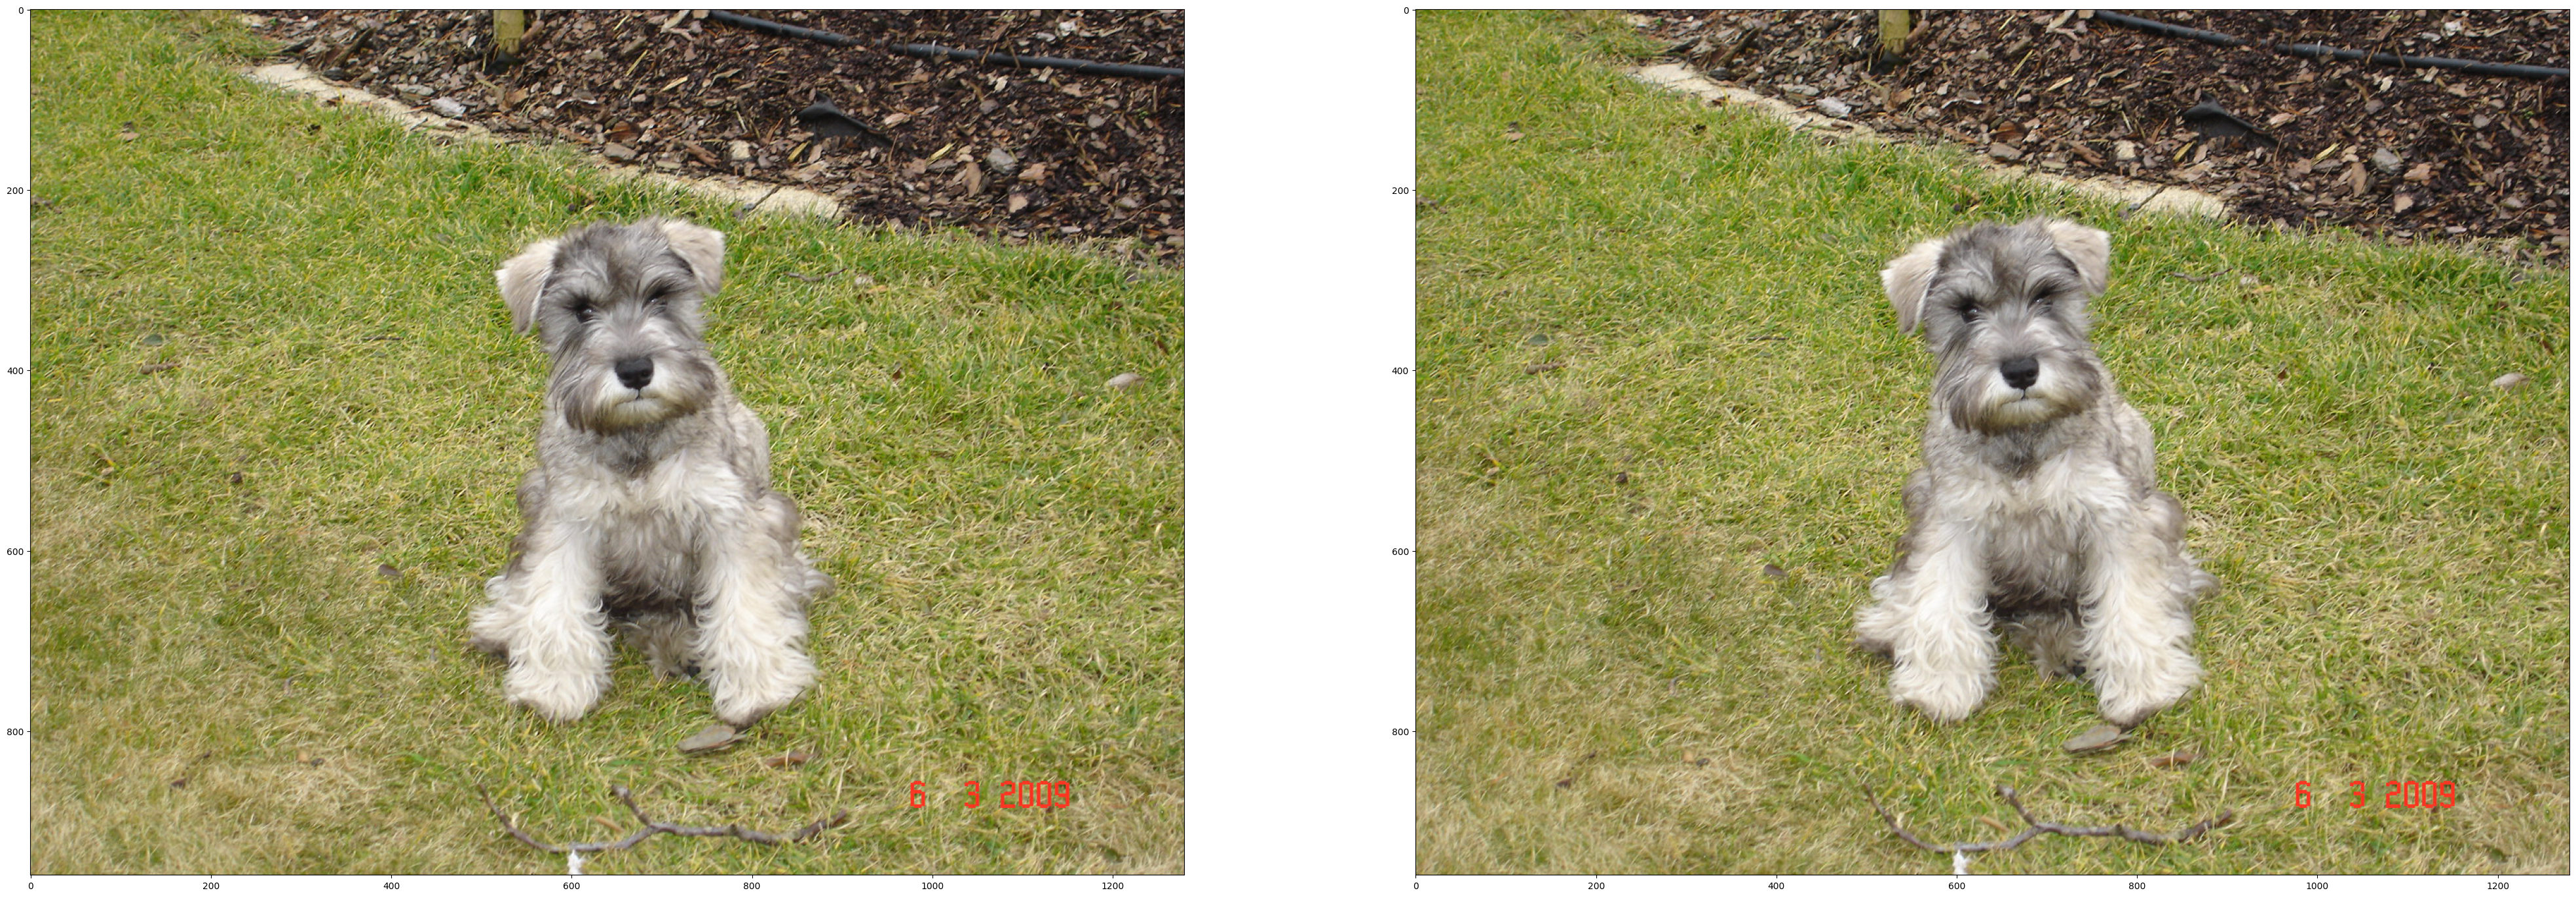

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

def letterToBits(letter):
    letterIntValue = ord(letter)
    return [1 if digit=='1' else 0 for digit in format(letterIntValue, '08b')]


def convertMessageToBits(message):
    bits = []
    for i in range(len(message)):
        letterBits = letterToBits(message[i])
        for bit in letterBits:
            bits.append(bit)
            
    return bits

        
def encode(message, image, channel = 'red'):
    imageWidth = image.shape[0]
    messageBits = convertMessageToBits(message)
    newImage = image.copy()
    if channel == 'red':
        channelNum = 0
    elif channel == 'green':
        channelNum = 1
    elif channel == 'blue':
        channelNum = 2
    
    newImage *= 255
    newImage = newImage.astype(np.uint8)
    for i, bit in enumerate(messageBits):
        imageRow = i // imageWidth
        imageCol = i %  imageWidth
        newImage[imageRow, imageCol][channelNum] = (newImage[imageRow, imageCol][channelNum] & ~3) | bit
    
    return newImage
    

def decode(image, channel='red'):
    imageCopy = image.copy()
    imageCopy *= 255
    imageCopy = imageCopy.astype(np.uint8)
    
    if channel == 'red':
        channelNum = 0
    elif channel == 'green':
        channelNum = 1
    elif channel == 'blue':
        channelNum = 2
        
    message = ''
    bits = ''
    for i, value in enumerate(list(chain.from_iterable(imageCopy[:,:,channelNum]))):
        bits += str(value & 1)
        
        if(i % 8 == 7):
            asciiValue = int(bits, 2)
            bits = ''
            if(not chr(asciiValue).isprintable()):
                break
            message += chr(asciiValue)
        
    return message


if __name__ == '__main__':
    path = input("Path to image: ")
    message = input("Message: ")
#     path = "piesek.png"
#     message = "WZK JEST FAJNE"
    
    originalImage = plt.imread(path)
    encodedImage = encode(message, originalImage)
    decodedMessage = decode(encodedImage)
    
    _, (originalImagePlot, encodedImagePlot) = plt.subplots(ncols = 2, figsize=(50,50))
    originalImagePlot.imshow(originalImage)
    encodedImagePlot.imshow(encodedImage)
    
    print("\nOriginal message: " + message)
    print("Message decoded from encoded image: " + decodedMessage)
    
    